In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.stats import norm

from math import log, sqrt, exp
from scipy import stats  
import numpy as np
import math

In [4]:
def S_eff(S0,q,t1,t2,T):
    i=t1//T+1
    t=T*i
    di=S0*q
    div=0
    while(t1<=t<t2):
        div+=di*exp(-r*t)
        i+=1
        t=T*i
    return S0-div

def d1(S0,t1,t2,K,r,sigma):
    T=t2-t1
    return (log(S0/K)+(r+sigma**2/2)*T)/(sigma*T**0.5)

def d2(S0,t1,t2,K,r,sigma):
    T=t2-t1
    return d1(S0,t1,t2,K,r,sigma)-sigma*T**0.5

def bs_price(S0,t1,t2,K,r,sigma,q,T,opt_type="call"):
    S=S_eff(S0,q,t1,t2,T)
    if opt_type=="call":
        return S*norm.cdf(d1(S,t1,t2,K,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,t1,t2,K,r,sigma))
    elif opt_type=="put":
        return -S*norm.cdf(-d1(S,t1,t2,K,r,sigma))+K*exp(-r*T)*norm.cdf(-d2(S,t1,t2,K,r,sigma))
    else:
        raise ValueError("wrong opt_type")

def delta(S0,t1,t2,K,r,sigma,q,opt_type="call"):
    T=t2-t1
    if opt_type=="call":
        return exp(-q*T)*norm.cdf(d1(S0,t1,t2,K,r,sigma))
    elif opt_type=="put":
        return exp(-q*T)*(norm.cdf(d1(S0,t1,t2,K,r,sigma))-1)
    else:
        raise ValueError("wrong opt_type")
        
def gamma(S0,t1,t2,K,r,sigma,q,opt_type="call"):
    T=t2-t1
    d1=d1(S0,t1,t2,K,r,sigma)
    return norm.pdf(d1)*exp(-q*T)/(S*sigma*T**0.5)
        
def theta(S0,t1,t2,K,r,sigma,q,opt_type="call"):
    d11=d1(S0,t1,t2,K,r,sigma)
    d12=d2(S0,t1,t2,K,r,sigma)
    T=t2-t1
    if opt_type=="call":
        return -S0*norm.pdf(d11)*sigma*exp(-q*T)/\
    (2*T**0.5)+q*S0*norm.cdf(d11)*exp(-q*T)-r*K*exp(-r*T)*norm.cdf(d12)
    elif opt_type=="put":
        return -S0*norm.pdf(d11)*sigma*exp(-q*T)/\
    (2*T**0.5)-q*S0*norm.cdf(-d11)*exp(-q*T)+r*K*exp(-r*T)*norm.cdf(-d12)
    else:
        raise ValueError("wrong opt_type")

def vega(S0,t1,t2,K,r,sigma,q,opt_type="call"):
    d1=d1(S0,t1,t2,K,r,sigma)
    T=t2-t1
    return S0*T**0.5*norm.pdf(d1)*exp(-q*T)

def rho(S0,t1,t2,K,r,sigma,q,opt_type="call"):
    d2=d2(S0,t1,t2,K,r,sigma)
    T=t2-t1
    if opt_type=="call":
        return K*T*exp(-r*T)*norm.cdf(d2)
    elif opt_type=="put":
        return -K*T*exp(-r*T)*norm.cdf(-d2)
    else:
        raise ValueError("wrong opt_type")

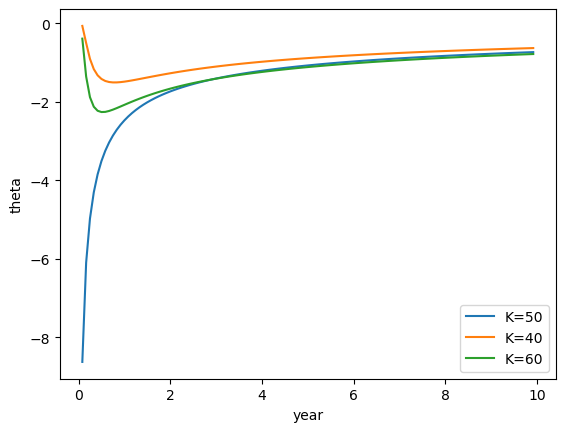

In [5]:
K=50
r=0
sigma=0.25
t1=0
S0=50
q=0
change=0.01
c_list1=[];c_list2=[];c_list3=[]
for i in range(1,120):
    t2=i/12
    c_list1.append(theta(S0,t1,t2,K,r,sigma,q,opt_type="call"))
K=40
for i in range(1,120):
    t2=i/12
    c_list2.append(theta(S0,t1,t2,K,r,sigma,q,opt_type="call"))

K=60
for i in range(1,120):
    t2=i/12
    c_list3.append(theta(S0,t1,t2,K,r,sigma,q,opt_type="call"))

time_year=[i/12 for i in range(1,120)]
plt.plot(time_year,c_list1,label='K=50')
plt.plot(time_year,c_list2,label='K=40')
plt.plot(time_year,c_list3,label='K=60')
plt.xlabel('year')
plt.ylabel('theta')
plt.legend()

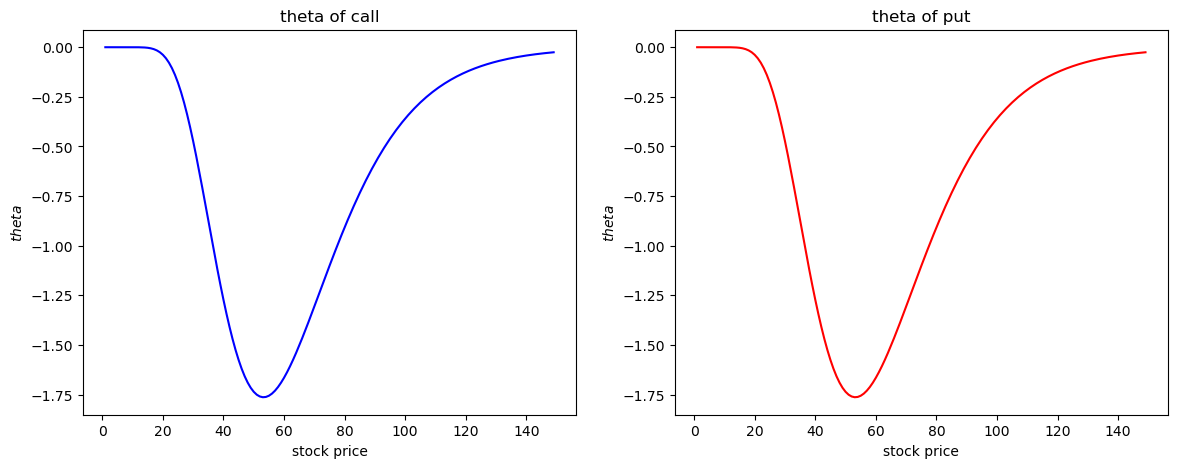

In [6]:
t2=2
K=50
r=0
sigma=0.25
q=0
t1=0
S0=50

change=0.01
c_list=[];p_list=[]
for i in range(1,150):
    S0=i
    c_list.append(theta(S0,t1,t2,K,r,sigma,q,opt_type="call"))
    p_list.append(theta(S0,t1,t2,K,r,sigma,q,opt_type="put"))
    
S_vec=[i for i in range(1,150)]
paths=c_list,p_list
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
colors = ['blue', 'red']
titles = ['theta of call', 'theta of put']
ylabels = ['$theta$', '$theta$']
T = len(S_vec) - 1
for i in range(2):
        axs[i].plot(S_vec,paths[i], c=colors[i])
        axs[i].set(xlabel='stock price', ylabel=ylabels[i], title=titles[i]) 
plt.show()